In [1]:
# torch with cuda
# %pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121

In [2]:
# %reload_ext autoreload
# %autoreload 2
# %matplotlib inline

In [3]:
from ultralytics import YOLO
import torch
import os

# Load a model
# model = YOLO("best.onnx")
model = YOLO("yolo11n.pt")

path = os.path.join(os.path.abspath("."),"License Plate Recognition.v6i.yolov11.zip")

# # Train the model
# train_results = model.train(
#     data=path,  # path to dataset YAML
#     epochs=100,  # number of training epochs
#     # workers=100,
#     # patience=20,
#     imgsz=640,  # training image size
#     device="cuda" if torch.cuda.is_available() else "cpu",  # device to run on, i.e. device=0 or device=0,1,2,3 or device=cpu
# )

# # Evaluate model performance on the validation set
# metrics = model.val()

# # Export the model to ONNX format
# path = model.export(format="onnx")  # return path to exported model

In [4]:
import cv2
from matplotlib import pyplot as plt
from plate_recognition import NumberPlateRecognition

rec = NumberPlateRecognition()

def run(img):
    rec.analyze(img)

# Perform object detection on an image
img = cv2.imread("example.jpg")
run(img)
img = cv2.flip(img, 0)
run(img)
img = cv2.flip(img, 1)
run(img)
img = cv2.flip(img, 0)
run(img)


0: 448x640 4 License_Plates, 19.0ms
Speed: 2.0ms preprocess, 19.0ms inference, 46.0ms postprocess per image at shape (1, 3, 448, 640)

0: 448x640 2 License_Plates, 7.0ms
Speed: 2.0ms preprocess, 7.0ms inference, 1.0ms postprocess per image at shape (1, 3, 448, 640)

0: 448x640 2 License_Plates, 9.0ms
Speed: 1.0ms preprocess, 9.0ms inference, 1.0ms postprocess per image at shape (1, 3, 448, 640)

0: 448x640 5 License_Plates, 6.0ms
Speed: 1.0ms preprocess, 6.0ms inference, 2.0ms postprocess per image at shape (1, 3, 448, 640)



0: 448x640 4 License_Plates, 9.0ms
Speed: 3.0ms preprocess, 9.0ms inference, 2.0ms postprocess per image at shape (1, 3, 448, 640)
[[432 438 476 453]
 [626 432 675 447]
 [129 441 169 453]
 [295 561 377 581]]
----------------


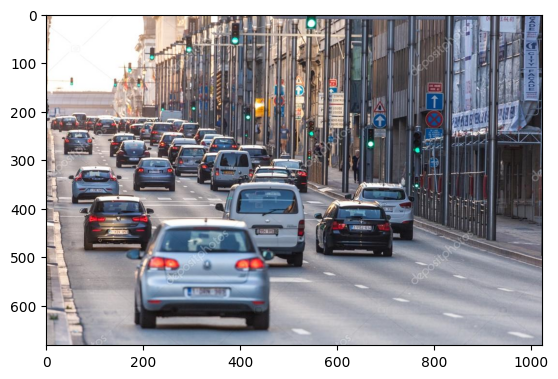

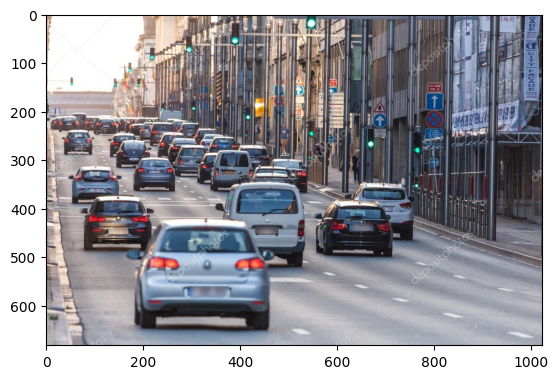

In [5]:
from plate_recognition import NumberPlateRecognition
from matplotlib import pyplot as plt
import cv2

rec = NumberPlateRecognition()
#img = cv2.imread("example.jpg")
img = cv2.imread("example.jpg")
img = img[:, :, ::-1]

def blur_image( image, bboxes):
    int_bboxes = bboxes.astype('int')
    print(int_bboxes)
    print("----------------")
    image = image.copy()
    for box in int_bboxes:
        cropped_img = image[box[1]:box[3], box[0]:box[2]]
        blurred_img = cv2.GaussianBlur(cropped_img, (25,25),0)
        x_offset, y_offset = box[0], box[1]
        x_end = x_offset + blurred_img.shape[1]
        y_end = y_offset + blurred_img.shape[0]
        image[y_offset:y_end, x_offset:x_end] = blurred_img
    return image


analyzed_img = rec.analyze(img)
result = blur_image(img, analyzed_img.boxes)


plt.imshow(img)
plt.show()
plt.imshow(result)
plt.show()
# original = Image.fromarray(img, 'RGB')
# result2 = Image.fromarray(result, 'RGB')

In [6]:
#rec.result.show()



In [23]:
from ultralytics.engine.results import Boxes
image = cv2.imread("example.jpg")
#car_boxes = model.predict(image, save = True)
# Let the NumberPlateRecognition run on the car bounding box


def analyze(image):
    result = model(image)[0]
    data: Boxes = result.boxes.cpu().numpy()
    return (data.xyxy,data.conf,data.cls,result.names)

xyxy,conf,cls,names = analyze(image)
print(names)







0: 448x640 14 cars, 3 traffic lights, 12.5ms
Speed: 2.0ms preprocess, 12.5ms inference, 2.0ms postprocess per image at shape (1, 3, 448, 640)
{0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant'